# Ejecución presupuestaria MRR (2021)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
!pip install openpyxl

/kaggle/input/ejpr202112/MENSUAL DICIEMBRE 2021 (EXCEL).xlsx
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [8]:
fileEP_202112 = '../input/ejpr202112/MENSUAL DICIEMBRE 2021 (EXCEL).xlsx'
# for pandas version >= 0.21.0
xls = pd.ExcelFile(fileEP_202112)

In [7]:
print(xls)

In [9]:
#filtro = '.*C[0-9][0-9]\.I[0-9][0-9].*'  En 2022 Aparece el componente y la medida. En 2021, no
filtro = '[0-9][0-9][0-9][A-Z]-.*'
totalMedida = pd.DataFrame()
Medida = pd.DataFrame()
for sheet_name in xls.sheet_names:
    if 'MRR' in sheet_name:
        df = pd.read_excel(xls, sheet_name, header=[1,2],index_col=[0])
        Medida = df.filter(regex=filtro, axis=0)
        if not Medida.empty:
            aplicacion =''
            #for aplicacion in Comp.index:
            for aplicacion, row in Medida.iterrows():
                strMedida = 'C[0-9][0-9]\.I[0-9][0-9]'
                try:
                    #medida = re.search(strMedida,aplicacion).group(0)
                    #componente = medida[0:3]
                    politica = aplicacion[0:4]
                    ministerio = Medida.axes[1].names[0].split("\n")[1]
                except AttributeError:
                    #medida = ''
                    #componente = ''
                    politica = ''
                    ministerio = ''
                    pass
                if type(row.values[2]) is str:
                    definitivos = 0
                else:
                    definitivos = row.values[2]
                    
                if type(row.values[3]) is str:
                    autorizados = 0
                else:
                    autorizados = row.values[3]
                    
                if type(row.values[4]) is str:
                    comprometidos = 0
                else:
                    comprometidos = row.values[4]
                    
                if type(row.values[5]) is str:
                    reconocidos = 0
                else:
                    reconocidos = row.values[5]
                    
                if type(row.values[6]) is str:
                    pagados = 0
                else:
                    pagados = row.values[6]
                    
                if definitivos > 0:
                    porcRealizado = reconocidos/definitivos * 100

                    
                fila = pd.DataFrame([[ministerio,politica,definitivos, autorizados, comprometidos, reconocidos,pagados, porcRealizado]],
                                    columns=['Ministerio','Politica', 'Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados','%Realizado'])
                totalMedida = totalMedida.append(fila)

            #print(Comp)

print(totalMedida)

                                      Ministerio Politica  Definitivos  \
0   ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN     000X      49003.0   
0   ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN     140A      78614.0   
0                                       JUSTICIA     000X        567.0   
0                                       JUSTICIA     110A      98942.0   
0                                        DEFENSA     000X      10200.0   
..                                           ...      ...          ...   
0      INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES     230A     183674.0   
0                                  UNIVERSIDADES     460A     203900.0   
0                                        SANIDAD     000X       5835.0   
0                                        SANIDAD     230B      13200.0   
0                                        SANIDAD     310B    2416965.0   

    Autorizados  Comprometidos  Reconocidos    Pagados  %Realizado  
0           0.0            0.0          0.

In [10]:
totalMedida.head()

,Ministerio,Politica,Definitivos,Autorizados,Comprometidos,Reconocidos,Pagados,%Realizado
0,"ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN",000X,49003.0,0.0,0.0,0.0,0.0,0.000000
0,"ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN",140A,78614.0,57145.0,53227.0,0.0,0.0,0.000000
0,JUSTICIA,000X,567.0,0.0,0.0,0.0,0.0,0.000000
0,JUSTICIA,110A,98942.0,98891.0,98891.0,98101.0,98101.0,99.150007
0,DEFENSA,000X,10200.0,10200.0,10200.0,10200.0,10200.0,100.000000


In [11]:
#pd.options.display.max_rows = None

columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados','%Realizado']
totalMedida.groupby(['Politica'])[columns_to_show].sum().sort_values('%Realizado', ascending=False)

,Definitivos,Autorizados,Comprometidos,Reconocidos,Pagados,%Realizado
Politica,,,,,,
000X,2113330.0,1581646.0,1581646.0,1422406.0,1060592.0,521.928153
460A,1460452.0,1035471.0,1022331.0,947463.0,456881.0,208.658882
230A,1153328.0,1072337.0,993274.0,919647.0,775986.0,189.485335
490A,406719.0,295806.0,295806.0,294868.0,138587.0,172.334652
410C,115359.0,115359.0,115359.0,115359.0,115359.0,100.000000
460E,469710.0,469710.0,469710.0,469710.0,469710.0,100.000000
450D,33267.0,33267.0,33267.0,33267.0,0.0,100.000000
450C,277411.0,277411.0,277411.0,277411.0,200000.0,100.000000
420B,4949183.0,4949183.0,4949183.0,4949183.0,1285000.0,100.000000


In [12]:
totalMedida.to_excel(r'./resultado2021.xlsx',index=False)

# Datos por componente

In [17]:
columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados']
totalPolitica = totalMedida.groupby(['Politica'])[columns_to_show].sum().sort_values('Politica', ascending=True)
totalPolitica['%'] =totalPolitica['Reconocidos']/totalPolitica['Definitivos']*100
totalPolitica.head

<bound method NDFrame.head of           Definitivos  Autorizados  Comprometidos  Reconocidos    Pagados  \
Politica                                                                    
000X        2113330.0    1581646.0      1581646.0    1422406.0  1060592.0   
110A         107942.0     107538.0       104988.0      98101.0    98101.0   
120A          20000.0      19283.0        18464.0       1578.0     1578.0   
130A          12250.0       2550.0         2550.0          2.0        2.0   
140A          79864.0      58145.0        53227.0          0.0        0.0   
140B            570.0        283.0          283.0        283.0      283.0   
230A        1153328.0    1072337.0       993274.0     919647.0   775986.0   
230B          13200.0          0.0            0.0          0.0        0.0   
240A           4010.0          0.0            0.0          0.0        0.0   
240B          49000.0      24500.0        24500.0      24500.0    24500.0   
260A        1651000.0    1651000.0      162898

Text(0.5, 1.0, 'Importe Definitivo por Politica')

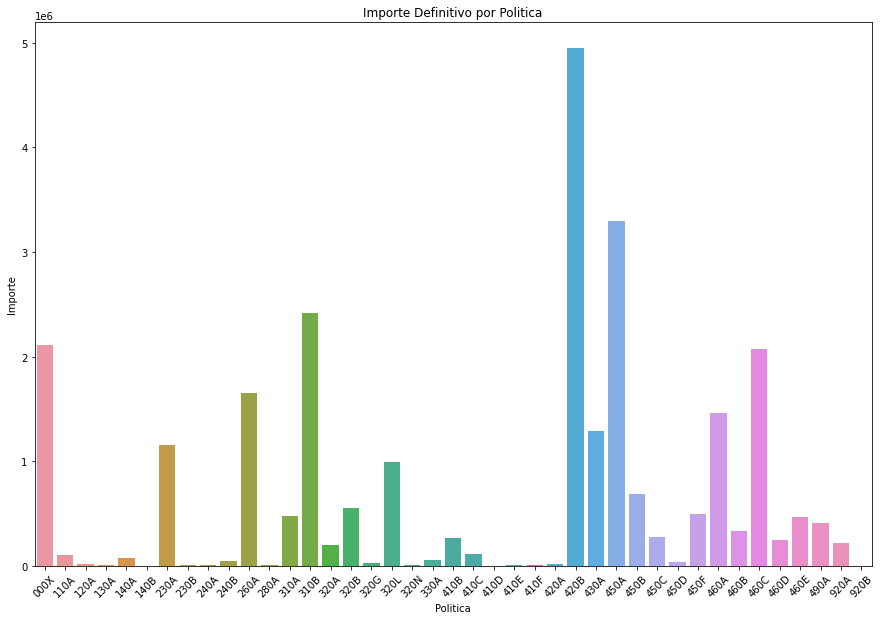

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
ImporteporComponente = totalMedida.groupby('Politica')['Definitivos'].sum()

plt.figure(figsize=(15,10))
sns.barplot(x=ImporteporComponente.index, y=ImporteporComponente)
plt.xticks(rotation= 45)
plt.xlabel('Politica')
plt.ylabel('Importe')
plt.title('Importe Definitivo por Politica')



Text(0.5, 1.0, 'Importe Autorizado por Politica')

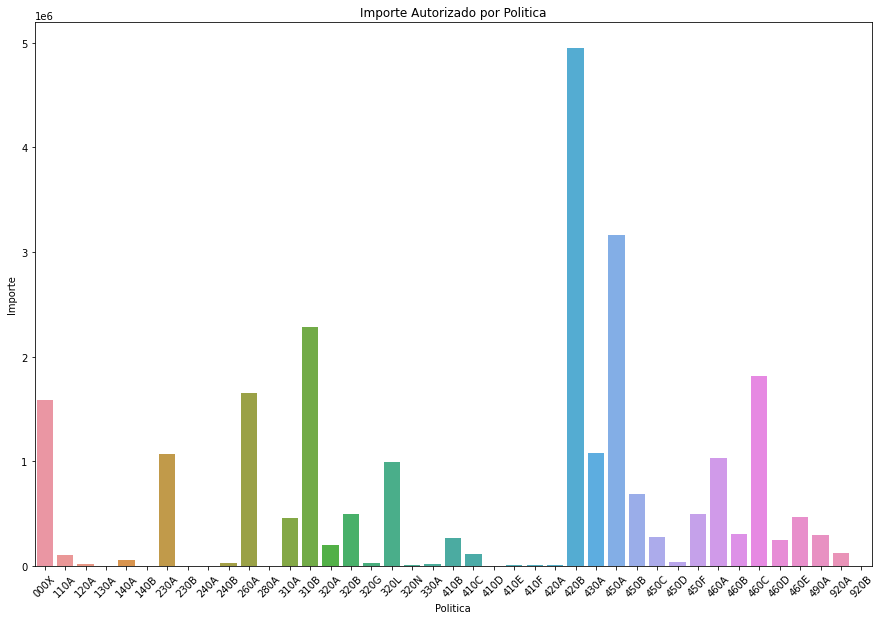

In [16]:
ImporteporPolitica = totalMedida.groupby('Politica')['Autorizados'].sum()

plt.figure(figsize=(15,10))
sns.barplot(x=ImporteporPolitica.index, y=ImporteporPolitica)
plt.xticks(rotation= 45)
plt.xlabel('Politica')
plt.ylabel('Importe')
plt.title('Importe Autorizado por Politica')

Text(0.5, 1.0, '% Realizado por Politica')

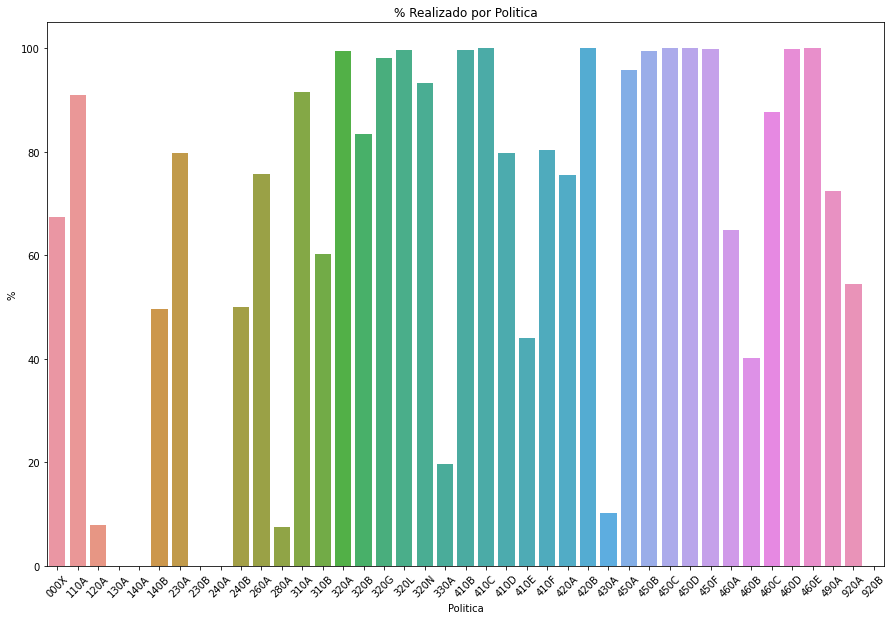

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x=totalPolitica.index, y=totalPolitica['%'])
plt.xticks(rotation= 45)
plt.xlabel('Politica')
plt.ylabel('%')
plt.title('% Realizado por Politica')

# Datos por ministerio

In [21]:
columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados']
totalMin = totalMedida.groupby(['Ministerio'])[columns_to_show].sum().sort_values('Ministerio', ascending=True)
totalMin['%'] =totalMin['Reconocidos']/totalMin['Definitivos']*100
totalMin.head

<bound method NDFrame.head of                                                     Definitivos  Autorizados  \
Ministerio                                                                     
AGRICULTURA, PESCA Y ALIMENTACIÓN                      406500.0     405507.0   
ASUNTOS ECONÓMICOS Y TRANSFORMACIÓN DIGITAL           3633490.0    3223670.0   
ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN           127617.0      57145.0   
CIENCIA E INNOVACIÓN                                  1100228.0    1100076.0   
CULTURA Y DEPORTE                                      222052.0     183372.0   
DEFENSA                                                 30200.0      29483.0   
DERECHOS SOCIALES Y AGENDA 2030                        916850.0     905502.0   
EDUCACIÓN Y FORMACIÓN PROFESIONAL                     1845783.0    1755481.0   
HACIENDA Y FUNCIÓN PÚBLICA                                350.0         10.0   
IGUALDAD                                                48590.0      35513.0   
INCLUSIÓN,

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(x=totalMin.index, y=totalComp['%'])
plt.xticks(rotation= 45)
plt.xlabel('Ministerio')
plt.ylabel('%')
plt.title('% Realizado por Componente')

ValueError: Grouper and axis must be same length

<Figure size 1080x720 with 0 Axes>